# Based on notebook found here: 
https://www.kaggle.com/salmanhiro/onn-onion-neural-network-with-lstm-85-accuracy

## Note: both pydot and graphviz are required to run this notebook successfully

In [1]:
import numpy as np #linear algebra
import pandas as pd #data processing, CSV file I/O
import os
import matplotlib.pyplot as plt
import re
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
import nltk
from keras.models import Sequential
from keras.layers import Input, Dense, LSTM, Dropout, Flatten, Embedding, Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras.utils import plot_model
import matplotlib.image as mpimg
from keras.callbacks import EarlyStopping, ModelCheckpoint

#required to use keras.utils plot_model
import pydot as pyd

Using TensorFlow backend.


In [2]:
for dirname, _, filenames in os.walk('/OneDrive/Documents/GitHub/ArtificialIntelligence/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/OneDrive/Documents/GitHub/ArtificialIntelligence/.gitignore
/OneDrive/Documents/GitHub/ArtificialIntelligence/.library.json
/OneDrive/Documents/GitHub/ArtificialIntelligence/Assignment 1 Genetic Algorithm  Due Friday 14th Feb.docx
/OneDrive/Documents/GitHub/ArtificialIntelligence/banana.jpg
/OneDrive/Documents/GitHub/ArtificialIntelligence/CIFAR.ipynb
/OneDrive/Documents/GitHub/ArtificialIntelligence/faster_rcnn.ipynb
/OneDrive/Documents/GitHub/ArtificialIntelligence/Genetic Algorithm Changed.ipynb
/OneDrive/Documents/GitHub/ArtificialIntelligence/Genetic Algorithm Template.ipynb
/OneDrive/Documents/GitHub/ArtificialIntelligence/Links.txt
/OneDrive/Documents/GitHub/ArtificialIntelligence/Machine Learning.ipynb
/OneDrive/Documents/GitHub/ArtificialIntelligence/MNIST.ipynb
/OneDrive/Documents/GitHub/ArtificialIntelligence/NewOnionOrNot.csv
/OneDrive/Documents/GitHub/ArtificialIntelligence/Onion Or Not.ipynb
/OneDrive/Documents/GitHub/ArtificialIntelligence/onion.png
/OneDrive/Documents/

In [3]:
data = pd.read_csv('/OneDrive/Documents/GitHub/ArtificialIntelligence/OnionOrNot.csv')

In [4]:
data.shape

(24000, 2)

In [5]:
data.head(10)

,text,label
0,Entire Facebook Staff Laughs As Man Tightens P...,1
1,Muslim Woman Denied Soda Can for Fear She Coul...,0
2,Bold Move: Hulu Has Announced That They’re Gon...,1
3,Despondent Jeff Bezos Realizes He’ll Have To W...,1
4,"For men looking for great single women, online...",1
5,Kim Jong-Un Wonders If Nuclear Threats Distrac...,1
6,"Omaha dad finds pot brownies, eats 4 of them, ...",0
7,"Pokémon Go player stabbed, keeps playing",0
8,Job Placement Service Helps Students Who Fail ...,1
9,Idiot Zoo Animal With Zero Predators Still Pro...,1


In [6]:
display(data['text'][100])

'Euclid man accused of egging neighbor’s house more than 100 times'

In [7]:
#labels = ['Onion','r/NotTheOnion']
labels = [1, 0]

Text(0.5, 1.0, 'Onions or not')

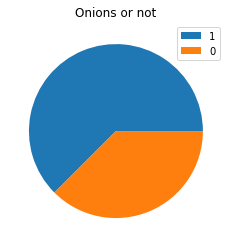

In [8]:
plt.pie(data['label'].value_counts())
plt.legend(labels)
plt.title('Onions or not')

In [9]:
data_process = data.copy()

In [10]:
data_process.head()

,text,label
0,Entire Facebook Staff Laughs As Man Tightens P...,1
1,Muslim Woman Denied Soda Can for Fear She Coul...,0
2,Bold Move: Hulu Has Announced That They’re Gon...,1
3,Despondent Jeff Bezos Realizes He’ll Have To W...,1
4,"For men looking for great single women, online...",1


In [11]:
data_process['text'] = data_process['text'].str.replace('[^a-zA-Z]', ' ', regex=True)

In [12]:
display(data['text'][2])

'Bold Move: Hulu Has Announced That They’re Gonna Go Ahead And Reboot ‘Shrill’ While It’s Still On Since You Idiots Will Watch Anything'

In [13]:
display(data_process['text'][2])

'Bold Move  Hulu Has Announced That They re Gonna Go Ahead And Reboot  Shrill  While It s Still On Since You Idiots Will Watch Anything'

In [14]:
data_process['text'] = data_process['text'].str.lower()

In [15]:
display(data_process['text'][2])

'bold move  hulu has announced that they re gonna go ahead and reboot  shrill  while it s still on since you idiots will watch anything'

In [16]:
num_words = 20000
max_len = 150
emb_size = 128
X = data_process['text']

In [17]:
X

0        entire facebook staff laughs as man tightens p...
1        muslim woman denied soda can for fear she coul...
2        bold move  hulu has announced that they re gon...
3        despondent jeff bezos realizes he ll have to w...
4        for men looking for great single women  online...
                               ...                        
23995    teen pregnancy rate prompting more high school...
23996    connecticut tv station under fire after using ...
23997     jurisprudence fetishist gets off on technicality
23998    employees from other department announce plan ...
23999          police drone crashes into police swat team 
Name: text, Length: 24000, dtype: object

In [18]:
token = Tokenizer(num_words=num_words)

In [19]:
token.fit_on_texts(list(X))

In [20]:
X = token.texts_to_sequences(X)

In [21]:
display(data['text'][2])
display(data_process['text'][2])
display(X[2])

'Bold Move: Hulu Has Announced That They’re Gonna Go Ahead And Reboot ‘Shrill’ While It’s Still On Since You Idiots Will Watch Anything'

'bold move  hulu has announced that they re gonna go ahead and reboot  shrill  while it s still on since you idiots will watch anything'

[2417,
 968,
 6349,
 32,
 516,
 20,
 37,
 111,
 3436,
 145,
 1413,
 11,
 4238,
 14123,
 107,
 14,
 6,
 129,
 8,
 626,
 27,
 4239,
 52,
 318,
 660]

Text(0.5, 1.0, 'Bold Move: Hulu Has Announced That They’re Gonna Go Ahead And Reboot ‘Shrill’ While It’s Still On Since You Idiots Will Watch Anything')

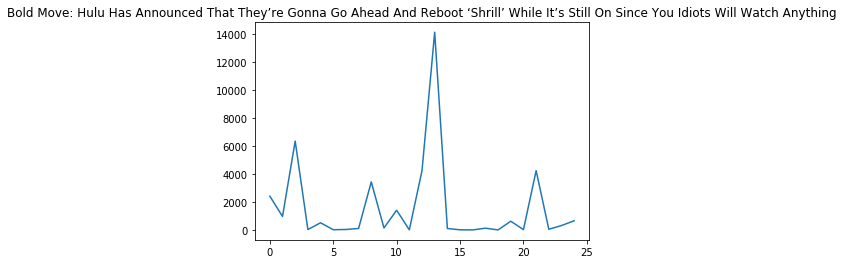

In [22]:
plt.plot(X[2], label = 'sample text spectra')
plt.title(str(data['text'][2]))

In [23]:
X = sequence.pad_sequences(X, maxlen = max_len)
Y = pd.get_dummies(data_process['label'])

In [24]:
Y = Y.values

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.1, random_state = 42)

In [26]:
def model():
    inp = Input(shape = (max_len, ))
    layer = Embedding(num_words, emb_size)(inp)
    layer = Bidirectional(LSTM(50, return_sequences = True, recurrent_dropout = 0.1))(layer)
    
    layer = GlobalMaxPool1D()(layer)
    layer = Dropout(0.2)(layer)
    
    layer = Dense(50, activation = 'relu')(layer)
    layer = Dropout(0.2)(layer)
    layer = Dense(50, activation = 'relu')(layer)
    layer = Dropout(0.2)(layer)
    layer = Dense(50, activation = 'relu')(layer)
    layer = Dropout(0.2)(layer)
    
    layer = Dense(2, activation = 'softmax')(layer)
    model = Model(inputs = inp, outputs = layer)
    
    model.compile(loss = 'binary_crossentropy', optimizer = 'nadam', metrics = ['accuracy'])
    return model

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 150, 128)          2560000   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 150, 100)          71600     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 100)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0   

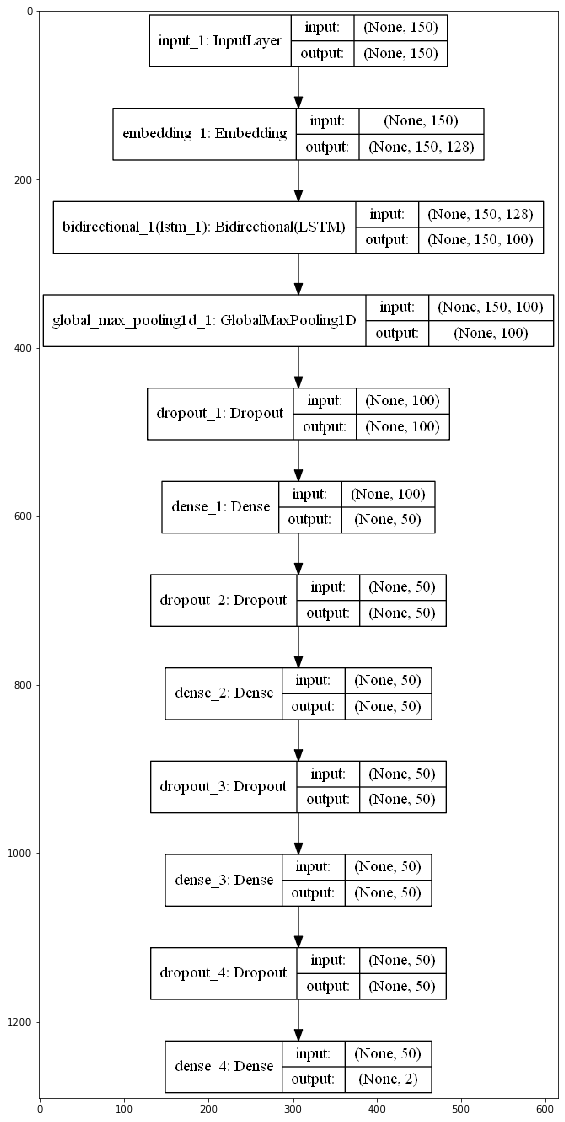

In [27]:
model = model()
model.summary()

plot_model(model, to_file = '/OneDrive/Documents/GitHub/ArtificialIntelligence/onion.png', show_shapes=True, show_layer_names = True)
plt.figure(figsize = (30,20))
img = mpimg.imread('/OneDrive/Documents/GitHub/ArtificialIntelligence/onion.png')
imgplot = plt.imshow(img)

In [28]:
file_path = 'save.hd5'
checkpoint = ModelCheckpoint(file_path, monitor= 'val_loss', save_best_only=True)
early_stop = EarlyStopping(monitor= 'loss', patience=1)

In [29]:
history = model.fit(x_train, y_train, batch_size = 32, epochs = 3, validation_split = 0.1, callbacks = [checkpoint, early_stop])
backs = [checkpoint, early_stop]

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 19440 samples, validate on 2160 samples
Epoch 1/3
19440/19440 [==============================] - 64s 3ms/step - loss: 0.4273 - accuracy: 0.8063 - val_loss: 0.3489 - val_accuracy: 0.8569
Epoch 2/3
19440/19440 [==============================] - 66s 3ms/step - loss: 0.1867 - accuracy: 0.9306 - val_loss: 0.3818 - val_accuracy: 0.8333
Epoch 3/3
19440/19440 [==============================] - 64s 3ms/step - loss: 0.0844 - accuracy: 0.9713 - val_loss: 0.5497 - val_accuracy: 0.8477


In [30]:
val_loss = history.history['val_loss']
loss = history.history['loss']

In [31]:
print('validation loss: ', val_loss[-1])
print('training loss: ', loss[-1])

validation loss:  0.549686469523995
training loss:  0.0844171449754755


In [32]:
score = model.evaluate(x_test, y_test)
print(model.metrics_names)
print(score)
print('test loss: ', score[0])
print('test accuracy: ', score[1])

2400/2400 [==============================] - 1s 603us/step
['loss', 'accuracy']
[0.5269204421838125, 0.8566666841506958]
test loss:  0.5269204421838125
test accuracy:  0.8566666841506958


In [33]:
history.history

{'val_loss': [0.3489141411251492, 0.38182996610800424, 0.549686469523995],
 'val_accuracy': [0.8569444417953491, 0.8333333134651184, 0.8476851582527161],
 'loss': [0.4272889544443829, 0.18673624054455953, 0.0844171449754755],
 'accuracy': [0.80632716, 0.930607, 0.9712963]}

# My improvements, aim for test accuracy >= 0.9

Through the scikit-learn algorithm cheat-sheet, I've found that the best estimator to use is Linear SVC or Naive Bayes. This is because my aim is to predict a category (Onion or Not), I have <100k samples (24k). This leads to Linear SVC, but if this does not work, since this is text data, the next estimator would be Naive Bayes. I will use KFold cross validation to split the training and test data.

In [34]:
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from keras.utils import to_categorical

In [35]:
kf = KFold(n_splits=10, shuffle=True)

In [36]:
clf = LinearSVC()

In [37]:
Y2 = data_process['label']

In [38]:
data_process['label'].shape

(24000,)

In [39]:
for train_index, test_index in kf.split(X):
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = Y2[train_index], Y2[test_index]
    clf.fit(x_train, y_train)
    print(clf.score(x_test, y_test))
    print()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.5704166666666667



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.4975



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.5479166666666667



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.52625



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.6033333333333334



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.47625



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.5808333333333333



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.5291666666666667



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.45708333333333334

0.5133333333333333



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## Due to convergence warning and low accuracy, I normalized my training data using StandardScaler

In [40]:
from sklearn.preprocessing import StandardScaler
import statistics

In [41]:
scaler = StandardScaler()

In [42]:
X2 = X

In [43]:
scaler.fit(X2)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [44]:
X3 = scaler.transform(X2)

In [45]:
X3

array([[ 0.        ,  0.        ,  0.        , ...,  3.74828244,
         0.06294408,  1.82921958],
       [ 0.        ,  0.        ,  0.        , ..., -0.50016743,
        -0.51960901, -0.07700169],
       [ 0.        ,  0.        ,  0.        , ..., -0.49112817,
        -0.42874942, -0.57932005],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.48781378,
        -0.51931685,  2.05070853],
       [ 0.        ,  0.        ,  0.        , ..., -0.50649491,
        -0.50237198, -0.00911423],
       [ 0.        ,  0.        ,  0.        , ..., -0.49745565,
         0.79274229, -0.66527828]])

In [46]:
for train_index, test_index in kf.split(X3):
    x_train, x_test = X3[train_index], X3[test_index]
    y_train, y_test = Y2[train_index], Y2[test_index]
    clf.fit(x_train, y_train)
    print(clf.score(x_test, y_test))
    print()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.65125



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.64375



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.6566666666666666



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.65375



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.6495833333333333



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.6745833333333333



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.6441666666666667



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.6470833333333333



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.6591666666666667

0.6675



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## While this has improved the results, they are still much lower than the desired  >= 0.9, for this reason I to use the Naive Bayes algorithm
This algorithm contains five seperate methods, which I will test and see which gets the best results

In [47]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB

# Does not work
#from sklearn.naive_bayes import CategoricalNB

In [48]:
x_train, x_test, y_train, y_test = train_test_split(X,Y2, test_size = 0.1)

In [49]:
gnb = GaussianNB()
mnb = MultinomialNB()
cnb = ComplementNB()
bnb = BernoulliNB()

In [50]:
y_pred_g = gnb.fit(x_train, y_train).predict(x_test)
y_pred_m = mnb.fit(x_train, y_train).predict(x_test)
y_pred_c = cnb.fit(x_train, y_train).predict(x_test)
y_pred_b = bnb.fit(x_train, y_train).predict(x_test)

In [51]:
print('Number of mislabeled points out of a total {} points: {}'.format(x_test.shape[0], (y_test != y_pred_g).sum()))
print('Number of mislabeled points out of a total {} points: {}'.format(x_test.shape[0], (y_test != y_pred_m).sum()))
print('Number of mislabeled points out of a total {} points: {}'.format(x_test.shape[0], (y_test != y_pred_c).sum()))
print('Number of mislabeled points out of a total {} points: {}'.format(x_test.shape[0], (y_test != y_pred_b).sum()))

Number of mislabeled points out of a total 2400 points: 1543
Number of mislabeled points out of a total 2400 points: 835
Number of mislabeled points out of a total 2400 points: 835
Number of mislabeled points out of a total 2400 points: 768


In [52]:
gnb.score(x_test, y_test)

0.3570833333333333

In [53]:
mnb.score(x_test, y_test)

0.6520833333333333

In [54]:
cnb.score(x_test, y_test)

0.6520833333333333

In [55]:
bnb.score(x_test, y_test)

0.68

In [56]:
for train_index, test_index in kf.split(X):
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = Y2[train_index], Y2[test_index]
    gnb.fit(x_train, y_train)
    mnb.fit(x_train, y_train)
    cnb.fit(x_train, y_train)
    bnb.fit(x_train, y_train)
    print(gnb.score(x_test, y_test))
    print(mnb.score(x_test, y_test))
    print(cnb.score(x_test, y_test))
    print(bnb.score(x_test, y_test))
    print()

0.3675
0.635
0.635
0.6604166666666667

0.3754166666666667
0.6345833333333334
0.6345833333333334
0.6545833333333333

0.38333333333333336
0.6420833333333333
0.6420833333333333
0.6683333333333333

0.37375
0.6404166666666666
0.6404166666666666
0.6766666666666666

0.3645833333333333
0.6575
0.6575
0.6783333333333333

0.38375
0.64125
0.64125
0.6704166666666667

0.36625
0.6570833333333334
0.6570833333333334
0.6733333333333333

0.37666666666666665
0.6533333333333333
0.6533333333333333
0.6779166666666666

0.37333333333333335
0.6558333333333334
0.6558333333333334
0.675

0.38333333333333336
0.6279166666666667
0.6279166666666667
0.6583333333333333



## Using the StandardScaler:

In [57]:
for train_index, test_index in kf.split(X3):
    x_train, x_test = X3[train_index], X3[test_index]
    y_train, y_test = Y2[train_index], Y2[test_index]
    gnb.fit(x_train, y_train)
    # commented out as X cannot be negative for these methods to work
    #mnb.fit(x_train, y_train)
    #cnb.fit(x_train, y_train)
    bnb.fit(x_train, y_train)
    print(gnb.score(x_test, y_test))
    #print(mnb.score(x_test, y_test))
    #print(cnb.score(x_test, y_test))
    print(bnb.score(x_test, y_test))
    print()

0.36583333333333334
0.6775

0.37416666666666665
0.6704166666666667

0.39
0.65875

0.39125
0.6508333333333334

0.3829166666666667
0.6629166666666667

0.65375
0.67

0.37416666666666665
0.65375

0.37083333333333335
0.6704166666666667

0.37041666666666667
0.6566666666666666

0.3645833333333333
0.6745833333333333



## Once again, results are not at expected level, lastly I will attempt a NN solution using different layers and different test sizes in attempt to fix the over-fitting issue pointed out in the comment section of the notebook

In [58]:
from keras import optimizers

In [59]:
def new_model(new_or_old):
    if new_or_old:
        model = Sequential()
        model.add(Dense(6, input_dim = 150, activation = 'relu'))
        model.add(Dropout(0.2))
        model.add(Dense(10, activation = 'linear'))
        model.add(Dropout(0.2))
        model.add(Dense(2, activation = 'softmax'))
        opt = optimizers.SGD(learning_rate = 0.1, momentum = 0, nesterov = True)
        model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    
    else:
        inp = Input(shape = (max_len, ))
        layer = Embedding(num_words, emb_size)(inp)
        layer = Bidirectional(LSTM(50, return_sequences = True, recurrent_dropout = 0.1))(layer)

        layer = GlobalMaxPool1D()(layer)
        layer = Dropout(0.2)(layer)

        layer = Dense(50, activation = 'relu')(layer)
        layer = Dropout(0.2)(layer)
        layer = Dense(50, activation = 'relu')(layer)
        layer = Dropout(0.2)(layer)
        layer = Dense(50, activation = 'relu')(layer)
        layer = Dropout(0.2)(layer)

        layer = Dense(2, activation = 'softmax')(layer)
        model = Model(inputs = inp, outputs = layer)
        model.compile(loss = 'binary_crossentropy', optimizer = 'nadam', metrics = ['accuracy'])
        
    return model

In [60]:
first_model = new_model(False)
second_model = new_model(True)

In [61]:
def test_model(model):
    results = []
    results.append(['validation loss', 'training loss', 'test loss', 'test accuracy'])

    for i in range(1, 10):
        test_size = i/10
        print(test_size)
        x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = test_size, random_state = 42)
        history = model.fit(x_train, y_train, batch_size = 32, epochs = 3, validation_split = 0.1, callbacks = [checkpoint, early_stop])
        backs = [checkpoint, early_stop]
        val_loss = history.history['val_loss']
        loss = history.history['loss']
        score = model.evaluate(x_test, y_test)
        results.append([val_loss, loss, score[0], score[1]])
    return results

In [62]:
results_1 = test_model(first_model)
results_2 = test_model(second_model)

0.1


C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 19440 samples, validate on 2160 samples
Epoch 1/3
19440/19440 [==============================] - 65s 3ms/step - loss: 0.4245 - accuracy: 0.8060 - val_loss: 0.3517 - val_accuracy: 0.8458
Epoch 2/3
19440/19440 [==============================] - 66s 3ms/step - loss: 0.1975 - accuracy: 0.9269 - val_loss: 0.4295 - val_accuracy: 0.8528
Epoch 3/3
2400/2400 [==============================] - 2s 626us/step
0.2
Train on 17280 samples, validate on 1920 samples
Epoch 1/3
17280/17280 [==============================] - 57s 3ms/step - loss: 0.0547 - accuracy: 0.9836 - val_loss: 0.6004 - val_accuracy: 0.8474
Epoch 2/3
17280/17280 [==============================] - 57s 3ms/step - loss: 0.0251 - accuracy: 0.9930 - val_loss: 0.8474 - val_accuracy: 0.8500
Epoch 3/3
4800/4800 [==============================] - 3s 591us/step
0.3
Train on 15120 samples, validate on 1680 samples
Epoch 1/3
15120/15120 [==============================] - 49s 3ms/step - loss: 0.0254 - accuracy: 0.9933 - val_loss: 1.0073 

In [63]:
for i in range(1,10):
    #print('validation loss: ',results[i][0][-1])
    #print('training loss: ',results[i][1][-1])
    #print('test loss: ',results[i][2])
    print('test accuracy',results_1[i][3])
    print('test accuracy',results_2[i][3])
    print()

test accuracy 0.8554166555404663
test accuracy 0.6229166388511658

test accuracy 0.9037500023841858
test accuracy 0.6287500262260437

test accuracy 0.9340277910232544
test accuracy 0.6356944441795349

test accuracy 0.9460416436195374
test accuracy 0.6307291388511658

test accuracy 0.9537500143051147
test accuracy 0.6297500133514404

test accuracy 0.9613194465637207
test accuracy 0.6290972232818604

test accuracy 0.9638095498085022
test accuracy 0.6292262077331543

test accuracy 0.9639583230018616
test accuracy 0.6270833611488342

test accuracy 0.9651851654052734
test accuracy 0.6244907379150391



In [64]:
kf2 = KFold(n_splits = 10, shuffle = True)

In [65]:
def test_model_kfold(model):
    results = []
    results.append(['validation loss', 'training loss', 'test loss', 'test accuracy'])

    for train_index, test_index in kf.split(X):
        x_train, x_test = X[train_index], X[test_index]
        y_train, y_test = Y2[train_index], Y2[test_index]
        history = model.fit(x_train, y_train, batch_size = 32, epochs = 3, validation_split = 0.1, callbacks = [checkpoint, early_stop])
        backs = [checkpoint, early_stop]
        val_loss = history.history['val_loss']
        loss = history.history['loss']
        score = model.evaluate(x_test, y_test)
        results.append([val_loss, loss, score[0], score[1]])
    return results

In [66]:
fourth_model = Sequential()
fourth_model.add(Dense(6, input_dim = 150, activation = 'relu'))
fourth_model.add(Dropout(0.2))
fourth_model.add(Dense(10, activation = 'linear'))
fourth_model.add(Dense(1, activation = 'softmax'))
opt = optimizers.SGD(learning_rate = 0.1, momentum = 0, nesterov = True)
fourth_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

inp = Input(shape = (max_len, ))
layer = Embedding(num_words, emb_size)(inp)
layer = Bidirectional(LSTM(50, return_sequences = True, recurrent_dropout = 0.1))(layer)

layer = GlobalMaxPool1D()(layer)
layer = Dropout(0.2)(layer)

layer = Dense(50, activation = 'relu')(layer)
layer = Dropout(0.2)(layer)
layer = Dense(50, activation = 'relu')(layer)
layer = Dropout(0.2)(layer)
layer = Dense(50, activation = 'relu')(layer)
layer = Dropout(0.2)(layer)

layer = Dense(1, activation = 'softmax')(layer)
third_model = Model(inputs = inp, outputs = layer)
third_model.compile(loss = 'binary_crossentropy', optimizer = 'nadam', metrics = ['accuracy'])

In [67]:
third_model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 150)               0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 150, 128)          2560000   
_________________________________________________________________
bidirectional_3 (Bidirection (None, 150, 100)          71600     
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 100)               0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 50)                5050      
_________________________________________________________________
dropout_13 (Dropout)         (None, 50)                0   

In [68]:
results_3 = test_model_kfold(third_model)
results_4 = test_model_kfold(fourth_model)

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 19440 samples, validate on 2160 samples
Epoch 1/3
19440/19440 [==============================] - 64s 3ms/step - loss: 9.6117 - accuracy: 0.3731 - val_loss: 9.4178 - val_accuracy: 0.3824
Epoch 2/3
19440/19440 [==============================] - 62s 3ms/step - loss: 9.6117 - accuracy: 0.3731 - val_loss: 9.4178 - val_accuracy: 0.3824
Epoch 3/3
2400/2400 [==============================] - 1s 548us/step
Train on 19440 samples, validate on 2160 samples
Epoch 1/3
19440/19440 [==============================] - 63s 3ms/step - loss: 9.5967 - accuracy: 0.3741 - val_loss: 9.3119 - val_accuracy: 0.3894
Epoch 2/3
2400/2400 [==============================] - 1s 540us/step
Train on 19440 samples, validate on 2160 samples
Epoch 1/3
19440/19440 [==============================] - 64s 3ms/step - loss: 9.5770 - accuracy: 0.3754 - val_loss: 9.2978 - val_accuracy: 0.3903
Epoch 2/3
2400/2400 [==============================] - 1s 528us/step
Train on 19440 samples, validate on 2160 samples
Epoch 1/3
194

In [69]:
for i in range(1,10):
    #print('validation loss: ',results[i][0][-1])
    #print('training loss: ',results[i][1][-1])
    #print('test loss: ',results[i][2])
    print('test accuracy',results_3[i][3])
    print('test accuracy',results_4[i][3])
    print()

test accuracy 0.38333332538604736
test accuracy 0.3595833480358124

test accuracy 0.36916667222976685
test accuracy 0.3733333349227905

test accuracy 0.3579166531562805
test accuracy 0.36375001072883606

test accuracy 0.37833333015441895
test accuracy 0.38458332419395447

test accuracy 0.3854166567325592
test accuracy 0.3629166781902313

test accuracy 0.3774999976158142
test accuracy 0.37416666746139526

test accuracy 0.3841666579246521
test accuracy 0.38083332777023315

test accuracy 0.36375001072883606
test accuracy 0.37166666984558105

test accuracy 0.36625000834465027
test accuracy 0.3904166519641876



# To test the models, I pulled more recent data and tested it
I found the code for doing this on https://github.com/lukefeilberg/onion/blob/f5643ffb7619ec80e51dac6b32ea17bbdc0fc8de/Onion.ipynb

In [70]:
import seaborn as sns
import warnings
import re
import time
import requests
import json
import csv
import datetime
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

warnings.filterwarnings('ignore')

In [71]:
dates_list = []

for i in range(10,21):
    dates_list.append('01/01/20'+str(i))
    dates_list.append('01/06/20'+str(i))
    
dates_list.pop()
dates_list

['01/01/2010',
 '01/06/2010',
 '01/01/2011',
 '01/06/2011',
 '01/01/2012',
 '01/06/2012',
 '01/01/2013',
 '01/06/2013',
 '01/01/2014',
 '01/06/2014',
 '01/01/2015',
 '01/06/2015',
 '01/01/2016',
 '01/06/2016',
 '01/01/2017',
 '01/06/2017',
 '01/01/2018',
 '01/06/2018',
 '01/01/2019',
 '01/06/2019',
 '01/01/2020']

In [72]:
def getTimeStamp(date_input):
    return time.mktime(datetime.datetime.strptime(date_input, "%d/%m/%Y").timetuple())

dates = [int(getTimeStamp(date)) for date in dates_list]
dates

[1262304000,
 1275346800,
 1293840000,
 1306882800,
 1325376000,
 1338505200,
 1356998400,
 1370041200,
 1388534400,
 1401577200,
 1420070400,
 1433113200,
 1451606400,
 1464735600,
 1483228800,
 1496271600,
 1514764800,
 1527807600,
 1546300800,
 1559343600,
 1577836800]

In [73]:
def getPushshiftData(after, before, sub):
    url = ('https://api.pushshift.io/reddit/search/submission/?size=1000&after='+
           str(after)+'&before='+str(before)+'&subreddit='+str(sub)+'&sort_type=score'+'&sort=desc')
    print(url)
    r = requests.get(url)
    data = json.loads(r.text)
    return data['data']

In [74]:
def getTitles(subreddit):
    titles_new = []
    titles = []
    
    for i in range(len(dates)-1):
        after = dates[i]
        before = dates[i+1]
        
        raw_json = getPushshiftData(after, before, subreddit)
        
        titles_new = [post['title'] for post in raw_json]
        
        titles = titles + titles_new
        
    titles = list(set(titles))
    return titles

not_onion = getTitles('nottheonion')
onion = getTitles('theonion')

onion = onion[:9000]
not_onion = not_onion[:15000]

https://api.pushshift.io/reddit/search/submission/?size=1000&after=1262304000&before=1275346800&subreddit=nottheonion&sort_type=score&sort=desc
https://api.pushshift.io/reddit/search/submission/?size=1000&after=1275346800&before=1293840000&subreddit=nottheonion&sort_type=score&sort=desc
https://api.pushshift.io/reddit/search/submission/?size=1000&after=1293840000&before=1306882800&subreddit=nottheonion&sort_type=score&sort=desc
https://api.pushshift.io/reddit/search/submission/?size=1000&after=1306882800&before=1325376000&subreddit=nottheonion&sort_type=score&sort=desc
https://api.pushshift.io/reddit/search/submission/?size=1000&after=1325376000&before=1338505200&subreddit=nottheonion&sort_type=score&sort=desc
https://api.pushshift.io/reddit/search/submission/?size=1000&after=1338505200&before=1356998400&subreddit=nottheonion&sort_type=score&sort=desc
https://api.pushshift.io/reddit/search/submission/?size=1000&after=1356998400&before=1370041200&subreddit=nottheonion&sort_type=score&so

In [75]:
df1 = pd.DataFrame({'text':onion})
df1['label'] = 1

df2 = pd.DataFrame({'text':not_onion})
df2['label'] = 0

df = pd.concat([df1,df2])

df = df.sample(frac=1).reset_index(drop=True)

df.to_csv('NewOnionOrNot.csv', index = False)

#df['text'] = df['text'].str.lower()
#df['text'] = df['text'].str.replace(r'&amp;', 'and')
#df['text'] = df['text'].str.replace(r'-', ' ')
#df['text'] = df['text'].str.replace(r'[^\s\w]', '')

#df.to_csv('NewOnionOrNotClean.csv')

df.head()

,text,label
0,"""Teacher Fired for Refusing to Make Students B...",0
1,Nearly 40% of 2019 farm income will come from ...,0
2,Indiana Child to Ted Cruz: 'You Suck',0
3,Turkey clears bird of spying for Israel,0
4,Realtor Was Not Expecting Such Hard-Hitting Qu...,1


In [76]:
new_test_data = pd.read_csv('/OneDrive/Documents/GitHub/ArtificialIntelligence/NewOnionOrNot.csv')

In [77]:
new_test_data.head()

,text,label
0,"""Teacher Fired for Refusing to Make Students B...",0
1,Nearly 40% of 2019 farm income will come from ...,0
2,Indiana Child to Ted Cruz: 'You Suck',0
3,Turkey clears bird of spying for Israel,0
4,Realtor Was Not Expecting Such Hard-Hitting Qu...,1


In [78]:
new_test_data.shape

(24000, 2)

In [79]:
data.shape

(24000, 2)

In [166]:
#temp = pd.concat([new_test_data, data])
#print(temp['text'].size)
#temp.drop_duplicates(keep = False)

temp = new_test_data.copy()
temp.loc[temp.index.difference(data.index), ]
print(temp['text'].size)
print(temp.size)

#data.loc[data['text'] == '"Teacher Fired for Refusing to Make Students Buy Pricey Textbooks"']

#if data.loc[data['text'] == temp['text'][0]].empty:
    #print('a')
#else:
    #print('b')

temp = pd.DataFrame()
    
for i in range(new_test_data['text'].size):
    if data.loc[data['text'] == new_test_data['text'][i]].empty:
        #print(new_test_data.loc[new_test_data['text'] == new_test_data['text'][i]])
        temp = temp.append(new_test_data.loc[new_test_data['text'] == new_test_data['text'][i]])
        
print(temp.size)
print(temp['text'].size)

24000
48000
998
499


In [167]:
temp

,text,label
23,Teen dies from using too much deodorant,0
31,Susan Collins had senators in bipartisan meeti...,0
67,Nudist Community Upset USPS Mail Carrier Won’t...,0
69,Sober driver arrested for DUI when deputy blow...,0
123,Devin Nunes Threatens Defamation Lawsuit After...,1
...,...,...
23381,Owner of Pho King Good noodle shop says he's n...,0
23382,Tillerson: 'I didn't want this job ... My wife...,0
23525,Jerry Springer: Republicans should pay me for ...,0
23596,"Police smell meth, raid home, kill 80 year old...",0


In [168]:
temp['text'] = temp['text'].str.replace('[^a-zA-Z]', ' ', regex=True)

In [169]:
temp['text'] = temp['text'].str.lower()

In [170]:
new_token = Tokenizer(num_words=num_words)

In [171]:
new_token.fit_on_texts(list(temp))

In [172]:
new_X = new_token.texts_to_sequences(temp)

In [180]:
new_X = sequence.pad_sequences(new_X, maxlen = max_len)
new_Y = pd.get_dummies(temp['label'])

In [181]:
new_Y = new_Y.values

In [182]:
X.shape

(24000, 150)

In [183]:
new_X.shape

(2, 150)

In [184]:
temp.head()

,text,label
23,teen dies from using too much deodorant,0
31,susan collins had senators in bipartisan meeti...,0
67,nudist community upset usps mail carrier won t...,0
69,sober driver arrested for dui when deputy blow...,0
123,devin nunes threatens defamation lawsuit after...,1


In [185]:
new_Y.shape

(499, 2)

In [186]:
model_test = model.predict(new_X)
first_model_test = first_model.predict(new_X)
second_model_test = second_model.predict(new_X)
third_model_test = third_model.predict(new_X)
fourth_model_test = fourth_model.predict(new_X)
print(confusion_matrix(model_test, new_Y))
print(confusion_matrix(first_model_test, new_Y))
print(confusion_matrix(second_model_test, new_Y))
print(confusion_matrix(third_model_test, new_Y))
print(confusion_matrix(fourth_model_test, new_Y))

ValueError: Found input variables with inconsistent numbers of samples: [2, 499]